In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('./Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
./Dataset/test\glioma\1848.jpg
./Dataset/test\glioma\1882.jpg
./Dataset/test\glioma\1883.jpg
./Dataset/test\glioma\1915.jpg
./Dataset/test\glioma\1918.jpg
./Dataset/test\glioma\1923.jpg
./Dataset/test\glioma\1927.jpg
./Dataset/test\glioma\1952.jpg
./Dataset/test\glioma\1974.jpg
./Dataset/test\glioma\1978.jpg
./Dataset/test\glioma\1986.jpg
./Dataset/test\glioma\1994.jpg
./Dataset/test\glioma\1996.jpg
./Dataset/test\glioma\2004.jpg
./Dataset/test\glioma\2006.jpg
./Dataset/test\glioma\2010.jpg
./Dataset/test\glioma\2021.jpg
./Dataset/test\glioma\2024.jpg
./Dataset/test\glioma\2032.jpg
./Dataset/test\glioma\2048.jpg
./Dataset/test\glioma\2049.jpg
./Dataset/test\glioma\2065.jpg
./Dataset/test\glioma\2068.jpg
./Dataset/test\glioma\2078.jpg
./Dataset/test\glioma\2080.jpg
./Dataset/test\gli

./Dataset/train\glioma\1841.jpg
./Dataset/train\glioma\1842.jpg
./Dataset/train\glioma\1843.jpg
./Dataset/train\glioma\1844.jpg
./Dataset/train\glioma\1845.jpg
./Dataset/train\glioma\1846.jpg
./Dataset/train\glioma\1847.jpg
./Dataset/train\glioma\1849.jpg
./Dataset/train\glioma\1850.jpg
./Dataset/train\glioma\1851.jpg
./Dataset/train\glioma\1852.jpg
./Dataset/train\glioma\1853.jpg
./Dataset/train\glioma\1854.jpg
./Dataset/train\glioma\1855.jpg
./Dataset/train\glioma\1856.jpg
./Dataset/train\glioma\1857.jpg
./Dataset/train\glioma\1858.jpg
./Dataset/train\glioma\1859.jpg
./Dataset/train\glioma\1860.jpg
./Dataset/train\glioma\1861.jpg
./Dataset/train\glioma\1862.jpg
./Dataset/train\glioma\1863.jpg
./Dataset/train\glioma\1864.jpg
./Dataset/train\glioma\1865.jpg
./Dataset/train\glioma\1866.jpg
./Dataset/train\glioma\1867.jpg
./Dataset/train\glioma\1868.jpg
./Dataset/train\glioma\1869.jpg
./Dataset/train\glioma\1870.jpg
./Dataset/train\glioma\1871.jpg
./Dataset/train\glioma\1872.jpg
./Datase

./Dataset/train\pituitary\1010.jpg
./Dataset/train\pituitary\1011.jpg
./Dataset/train\pituitary\1012.jpg
./Dataset/train\pituitary\1013.jpg
./Dataset/train\pituitary\1014.jpg
./Dataset/train\pituitary\1015.jpg
./Dataset/train\pituitary\1016.jpg
./Dataset/train\pituitary\1017.jpg
./Dataset/train\pituitary\1018.jpg
./Dataset/train\pituitary\1019.jpg
./Dataset/train\pituitary\1020.jpg
./Dataset/train\pituitary\1021.jpg
./Dataset/train\pituitary\1022.jpg
./Dataset/train\pituitary\1023.jpg
./Dataset/train\pituitary\1024.jpg
./Dataset/train\pituitary\1025.jpg
./Dataset/train\pituitary\1026.jpg
./Dataset/train\pituitary\1027.jpg
./Dataset/train\pituitary\1028.jpg
./Dataset/train\pituitary\1029.jpg
./Dataset/train\pituitary\1031.jpg
./Dataset/train\pituitary\1032.jpg
./Dataset/train\pituitary\1034.jpg
./Dataset/train\pituitary\1036.jpg
./Dataset/train\pituitary\1037.jpg
./Dataset/train\pituitary\1039.jpg
./Dataset/train\pituitary\1040.jpg
./Dataset/train\pituitary\1041.jpg
./Dataset/train\pitu

./Dataset/train\pituitary\941.jpg
./Dataset/train\pituitary\942.jpg
./Dataset/train\pituitary\943.jpg
./Dataset/train\pituitary\946.jpg
./Dataset/train\pituitary\947.jpg
./Dataset/train\pituitary\948.jpg
./Dataset/train\pituitary\950.jpg
./Dataset/train\pituitary\952.jpg
./Dataset/train\pituitary\953.jpg
./Dataset/train\pituitary\956.jpg
./Dataset/train\pituitary\958.jpg
./Dataset/train\pituitary\960.jpg
./Dataset/train\pituitary\961.jpg
./Dataset/train\pituitary\962.jpg
./Dataset/train\pituitary\963.jpg
./Dataset/train\pituitary\964.jpg
./Dataset/train\pituitary\965.jpg
./Dataset/train\pituitary\966.jpg
./Dataset/train\pituitary\967.jpg
./Dataset/train\pituitary\968.jpg
./Dataset/train\pituitary\969.jpg
./Dataset/train\pituitary\971.jpg
./Dataset/train\pituitary\972.jpg
./Dataset/train\pituitary\973.jpg
./Dataset/train\pituitary\974.jpg
./Dataset/train\pituitary\975.jpg
./Dataset/train\pituitary\976.jpg
./Dataset/train\pituitary\977.jpg
./Dataset/train\pituitary\978.jpg
./Dataset/trai

In [2]:
import tensorflow.keras as K

labels = ['glioma','meningioma','no_tumor','pituitary']

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

In [4]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
for label_name in labels:
    folderPath = os.path.join('.','Dataset','train',label_name)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(label_name)
        
for label_name in labels:
    folderPath = os.path.join('.','Dataset','test',label_name)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_test.append(img)
        y_test.append(label_name)
        
    
                
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 721.41it/s]


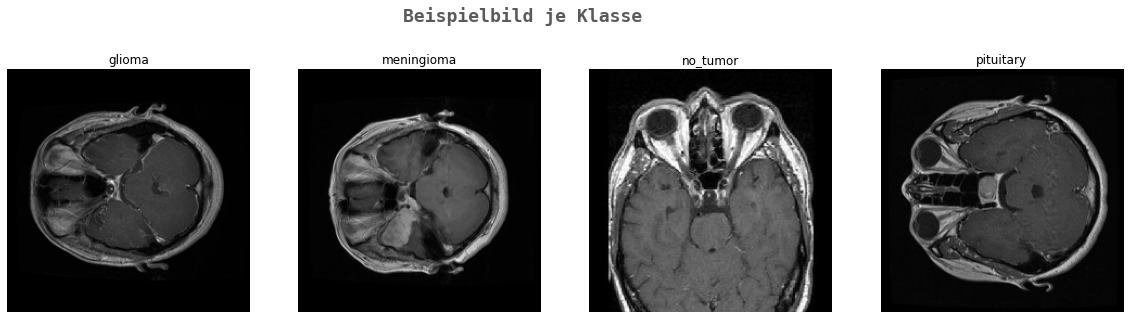

In [5]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Beispielbild je Klasse',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

y_test.shape

(625, 4)

In [8]:
input_t = K.Input(shape=(224, 224, 3))
res_model = K.applications.ResNet50(include_top=False,
                                   weights="imagenet",
                                   input_tensor=input_t)

In [9]:
for layer in res_model.layers[:143]:
    layer.trainable = False
    
for i, layer in enumerate(res_model.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [10]:
model = K.models.Sequential()
model.add(res_model)
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(256, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(64, activation='relu'))
model.add(K.layers.Dropout(0.5))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(4, activation='softmax'))

In [11]:
check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                              monitor="val_acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

In [12]:
model.compile(loss='categorical_crossentropy',
                  optimizer=K.optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])

c:\users\domem\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1,
                        validation_data=(X_test, y_test),
                        callbacks=[check_point])

Epoch 1/15
175/175 [==============================] - 213s 1s/step - loss: 1.7386 - accuracy: 0.3234 - val_loss: 0.7019 - val_accuracy: 0.7824
Epoch 2/15
175/175 [==============================] - 209s 1s/step - loss: 1.2464 - accuracy: 0.4999 - val_loss: 0.5701 - val_accuracy: 0.8416
Epoch 3/15
175/175 [==============================] - 209s 1s/step - loss: 1.0593 - accuracy: 0.5715 - val_loss: 0.5101 - val_accuracy: 0.8544
Epoch 4/15
175/175 [==============================] - 207s 1s/step - loss: 0.9145 - accuracy: 0.6331 - val_loss: 0.4317 - val_accuracy: 0.8848
Epoch 5/15
175/175 [==============================] - 207s 1s/step - loss: 0.8775 - accuracy: 0.6505 - val_loss: 0.3880 - val_accuracy: 0.9088
Epoch 6/15
175/175 [==============================] - 208s 1s/step - loss: 0.7593 - accuracy: 0.7148 - val_loss: 0.3566 - val_accuracy: 0.9184
Epoch 7/15
175/175 [==============================] - 207s 1s/step - loss: 0.6674 - accuracy: 0.7542 - val_loss: 0.3080 - val_accuracy: 0.9248

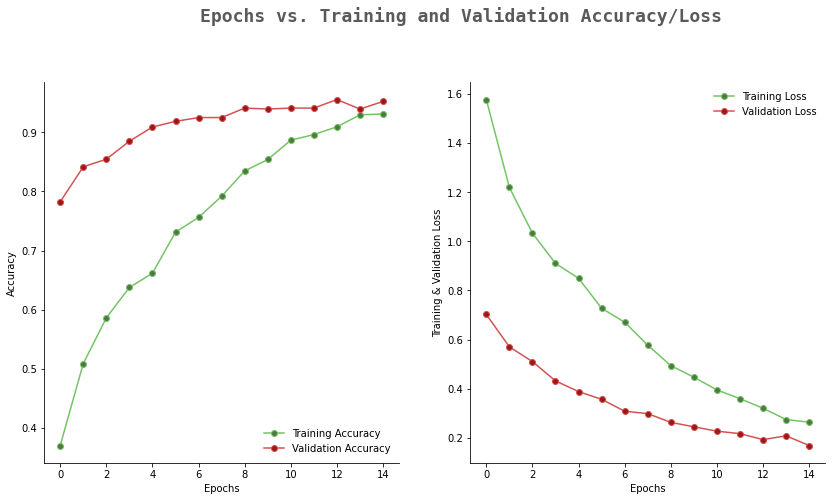

In [14]:
filterwarnings('ignore')

epochs = [i for i in range(15)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [15]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [16]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       236
           1       0.93      0.93      0.93       165
           2       0.85      1.00      0.92        40
           3       0.97      0.98      0.98       184

    accuracy                           0.95       625
   macro avg       0.93      0.96      0.95       625
weighted avg       0.95      0.95      0.95       625



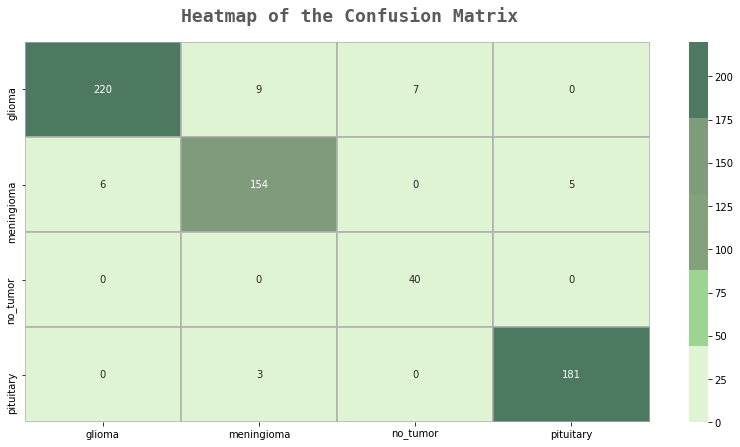

In [17]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3], fmt="d")
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

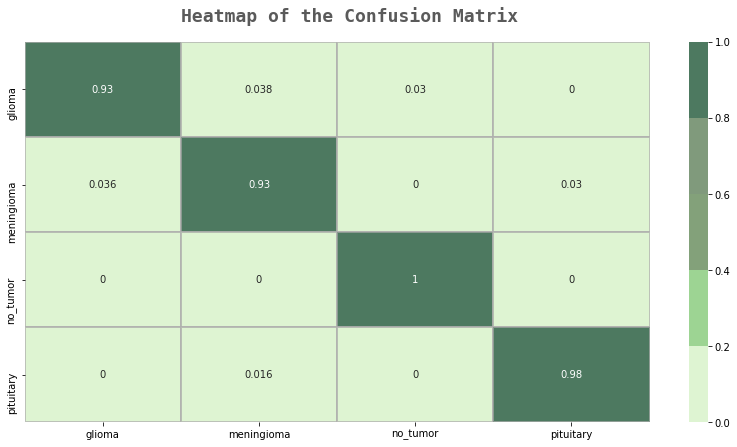

In [18]:
cm = confusion_matrix(y_test_new,pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(cm,ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()